#Considering only Indian restaurants in this analysis -
1. The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of      India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn      toward Delhi-NCR vs Rest of India.

Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

# Explanation

The csv library provides functionality to both read from and write to CSV files. Designed to work out of the box with 
Excel-generated CSV files, it is easily adapted to work with a variety of CSV formats and so we import csv, and NumPy library
which provides objects for multi-dimensional arrays, Pandas provides in-memory 2d table object called Dataframe ,It is like aspreadsheet with column names and row labels are imported.
as 'utf-8' codec can't decode byte 0xed in position 7044: invalid continuation byte i.e "Superstar Cafí©". we made the copy of original dataframe "data" , so that we canm bring additional changes in thew subsequent questions. afterward through excel , we got to know that india has country code, equals to 1. so we made a separate dataframe df1 out of it using loc(pandas.DataFrame.loc) property ,we Accessed group of values using labels , and made a separate dataframe "df1" out of it.
(pandas.Series.value_counts) Return a Series containing counts of unique values of city where country is india. The resulting city will be in descending order so that the first the first 5 is in the sequence , i.e 'New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad' . so we found the sum , and subsequently plotted it.

In [98]:
import csv 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
data = pd.read_csv('Downloads/zomato.csv', encoding = 'latin-1') 
df = data.copy() 
df1 = df.loc[df['Country Code'] == 1] 
a = df1['City'].value_counts() 
b = a.index 
c = a.values 
print(b)
print(c)


Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad', 'Guwahati',
       'Lucknow', 'Bhubaneshwar', 'Ahmedabad', 'Amritsar', 'Kochi',
       'Puducherry', 'Vadodara', 'Kolkata', 'Bangalore', 'Allahabad', 'Kanpur',
       'Surat', 'Vizag', 'Mumbai', 'Dehradun', 'Ranchi', 'Goa', 'Nashik',
       'Nagpur', 'Varanasi', 'Pune', 'Ludhiana', 'Bhopal', 'Agra',
       'Aurangabad', 'Patna', 'Coimbatore', 'Indore', 'Chennai', 'Mysore',
       'Jaipur', 'Mangalore', 'Chandigarh', 'Hyderabad', 'Secunderabad',
       'Mohali', 'Panchkula'],
      dtype='object')
[5473 1118 1080  251   25   21   21   21   21   21   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   18   18    2    1
    1]


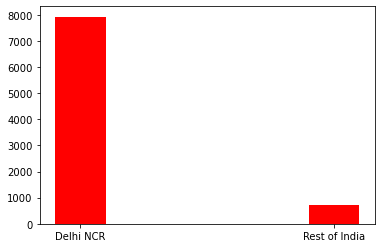

In [99]:
plot = ['Delhi NCR', 'Rest of India'] 
delhi = c[0:4].sum() 
rest_india = c[4:].sum() 
data = [delhi, rest_india] 
plt.bar(plot,data, color = 'r' , width = 0.2) 
plt.show() 

# CONCLUSIONS:
Delhi NCR is have more than 90 % of restaurants compare to that in th rest india.
delhi region can be the best kickstart for any restaurant - related start-up and could be the backbone of established bussinesses.

Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API      whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset

# Explanation

We make dataframe of country India as df1.We add cities of Delhi NCR in this array
Now we select cuisines of Delhi NCR. We selected rows of only Delhi NCR first to find out about its cuisines
We first select cuisines and then apply data cleaning on it. Then we seprate cuisines and then add it in array. Then we select unique values in it.Now we select cuisines of Rest of India.We first select cuisines and then apply data cleaning on it. 
Then we seprate cuisines and then add it in array. Then we select unique values in it. we found which cuisines are not in Delhi NCR but in Rest of India.Now from the unique values, we first start loop from Rest of India i.e. y, and then checked if the value of y is present in x or not, if not we printed it. 

In [100]:
import csv 
import numpy as np 
import pandas as pd 
import requests 
import matplotlib.pyplot as plt 
data = pd.read_csv('Downloads/zomato.csv', encoding = 'latin1') 
df = data.copy() 
df1 = df.loc[df['Country Code'] == 1] 
delhi_ncr = ['New Delhi', 'Ghaziabad','Noida', 'Gurgaon', 'Faridabad'] 
#select row of more than one column value, use isin() and pass value as list in it 
a = df1.loc[df1['City'].isin(delhi_ncr)]
b = a['Cuisines'].value_counts() 
a

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16
867,301730,Punjab Restaurant,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,8
868,301729,Raju Dhaba,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.306102,28.490098,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,8
869,301731,Rakheja Bakery,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305745,28.490062,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9108,18255134,Sky Grill,1,Noida,"2nd Floor, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367524,28.557537,"North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,2.6,Orange,Average,34
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,3
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,0


In [101]:
b

North Indian                                            904
North Indian, Chinese                                   475
Fast Food                                               331
Chinese                                                 325
North Indian, Mughlai                                   315
                                                       ... 
Cafe, American, Italian                                   1
North Indian, Chinese, Fast Food, Mithai                  1
Asian, Chinese, Thai, Malaysian, Indonesian, Burmese      1
Italian, Tex-Mex, Continental, North Indian               1
Finger Food, North Indian, Continental, Italian           1
Name: Cuisines, Length: 1157, dtype: int64

In [102]:
# filter out cities of DELHI NCR and find Rest of India.
c = df1.loc[(df1['City'] != 'New Delhi') & (df1['City'] != ' Noida') & (df1['City'] != 'Ghaziabad') & (df1['City'] != 'Gurgaon') & (df1['City'] != 'Faridabad')] 
d = c['Cuisines'].value_counts() 
e = a['Cuisines'].str.split(',') 
d

North Indian                                           142
North Indian, Chinese                                  133
North Indian, Mughlai                                   73
Fast Food                                               70
Chinese                                                 69
                                                      ... 
Hyderabadi, Awadhi                                       1
Cafe, Mexican, Italian, North Indian, Fast Food          1
European, North Indian, Mediterranean, American          1
Continental, North Indian, Asian                         1
Continental, Chinese, Thai, Malaysian, North Indian      1
Name: Cuisines, Length: 550, dtype: int64

In [103]:
e

865     [Chinese,  Fast Food,  Bakery]
866           [North Indian,  Chinese]
867                     [North Indian]
868                     [North Indian]
869                           [Bakery]
                     ...              
9108          [North Indian,  Chinese]
9109                       [Fast Food]
9110                       [Fast Food]
9111          [North Indian,  Chinese]
9112           [Raw Meats,  Fast Food]
Name: Cuisines, Length: 7947, dtype: object

In [104]:
x = [] 
for i in e:
    for j in i:
        j = j.strip() 
        x.append(j)
x = np.array(x) 
x = np.unique(x)
x

array(['Afghani', 'African', 'American', 'Andhra', 'Arabian', 'Armenian',
       'Asian', 'Assamese', 'Awadhi', 'Bakery', 'Belgian', 'Bengali',
       'Beverages', 'Bihari', 'Biryani', 'British', 'Burger', 'Burmese',
       'Cafe', 'Charcoal Grill', 'Chettinad', 'Chinese', 'Continental',
       'Cuisine Varies', 'Deli', 'Desserts', 'Drinks Only', 'European',
       'Fast Food', 'Finger Food', 'French', 'Goan', 'Greek', 'Gujarati',
       'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indian', 'Indonesian',
       'Iranian', 'Italian', 'Japanese', 'Juices', 'Kashmiri', 'Kerala',
       'Korean', 'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malaysian',
       'Mangalorean', 'Mediterranean', 'Mexican', 'Middle Eastern',
       'Mithai', 'Modern Indian', 'Moroccan', 'Mughlai', 'Naga',
       'Nepalese', 'North Eastern', 'North Indian', 'Oriya', 'Pakistani',
       'Parsi', 'Persian', 'Pizza', 'Portuguese', 'Rajasthani',
       'Raw Meats', 'Salad', 'Sandwich', 'Seafood', 'South American',
      

In [105]:
f = c['Cuisines'].str.split(',') 
y = [] 
for i in f:
    for j in i:
        j = j.strip()
        y.append(j)
y = np.array(y) 
y = np.unique(y) 
y

array(['African', 'American', 'Andhra', 'Arabian', 'Armenian', 'Asian',
       'Awadhi', 'BBQ', 'Bakery', 'Bengali', 'Beverages', 'Biryani',
       'British', 'Burger', 'Burmese', 'Cafe', 'Cajun', 'Charcoal Grill',
       'Chettinad', 'Chinese', 'Continental', 'Desserts', 'European',
       'Fast Food', 'Finger Food', 'French', 'German', 'Goan', 'Greek',
       'Gujarati', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indian',
       'Indonesian', 'Iranian', 'Italian', 'Japanese', 'Juices',
       'Kashmiri', 'Kerala', 'Korean', 'Lebanese', 'Lucknowi',
       'Maharashtrian', 'Malaysian', 'Malwani', 'Mangalorean',
       'Mediterranean', 'Mexican', 'Middle Eastern', 'Mithai',
       'Modern Indian', 'Mughlai', 'North Eastern', 'North Indian',
       'Parsi', 'Pizza', 'Portuguese', 'Rajasthani', 'Raw Meats', 'Salad',
       'Sandwich', 'Seafood', 'South Indian', 'Spanish', 'Steak',
       'Street Food', 'Sushi', 'Tea', 'Tex-Mex', 'Thai', 'Tibetan',
       'Vietnamese'], dtype='<U14')

using API Method :-

In [107]:
cuisines =[] 
for i in y:
    if i not in x:
        cuisines.append(i)
        print(i)
import requests 
user_key='3754f0440b3026cde542ed69af9f499a' 
basic_api='https://developers.zomato.com/api/v2.1' 
header={"User-agent": "curl/7.43.0",'Accept': 'application/json','user-key':user_key} 
data = {'city_id' : 1 , 'entity_type':'subzone'} 
response=requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers=header, params=data) 
data = response.json() 
ans = data['cuisines'] 
for i in ans:
    if i['cuisine']['cuisine_name'] in cuisines:
        print('Yes the Cuisine is Present in Delhi NCR,the given dataset is incomplete')

BBQ
Cajun
German
Malwani
Yes the Cuisine is Present in Delhi NCR,the given dataset is incomplete


 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

# Explanation

we select cuisines of Rest of India.We first select cuisines and then apply data cleaning on it.Then seprate cuisines and then add it in array. 

In [108]:
import csv 
import numpy as np 
import pandas as pd 
import requests 
import matplotlib.pyplot as plt 
data = pd.read_csv('Downloads/zomato.csv', encoding = 'latin1') 
df = data.copy() 
df1 = df.loc[df['Country Code'] == 1] 
ncr = ['New Delhi', 'Ghaziabad','Noida', 'Gurgaon', 'Faridabad'] 
#select rows of only Delhi NCR first to find out about its cuisines. 
a = df1.loc[df1['City'].isin(ncr)]
b = a['Cuisines'].value_counts() 
#filter out cities of NCR and find Rest of India. 
c = df1.loc[(df1['City'] != 'New Delhi') & (df1['City'] != ' Noida') & (df1['City'] != 'Ghaziabad') & (df1['City'] != 'Gurgaon')  & (df1['City'] != 'Faridabad')]
d = c.loc[c['City'] != 'Noida']
e = a['Cuisines'].str.split(',') 
x = [] 
for i in e:
    for j in i:
        j = j.strip() 
        x.append(j)
f = d['Cuisines'].str.split(',') 
y = [] 
for i in f:
    for j in i:
        j = j.strip() 
        y.append(j) 
l = pd.DataFrame(x) 
l = l.value_counts() 
print("Top 10 cuisines in Delhi NCR") 
for i in range(10):
    print(l.index[i][0], l.values[i]) 


Top 10 cuisines in Delhi NCR
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


In [109]:
m = pd.DataFrame(y) 
m = m.value_counts()  
print("Top 10 cuisines in Delhi NCR") 
for i in range(10):
    print(m.index[i][0], m.values[i]) 

Top 10 cuisines in Delhi NCR
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

# Explanation

select rows of only Delhi NCR first to find out about its cuisines.selected the row of more than one column value, using isin() and passed value as list in it. we filtered out cities of NCR and find Rest of India.Now we select cuisines of Delhi NCR. 
first select cuisines and then apply data cleaning on it. Then seprate cuisines and  add it in array.Then we select unique values in it.

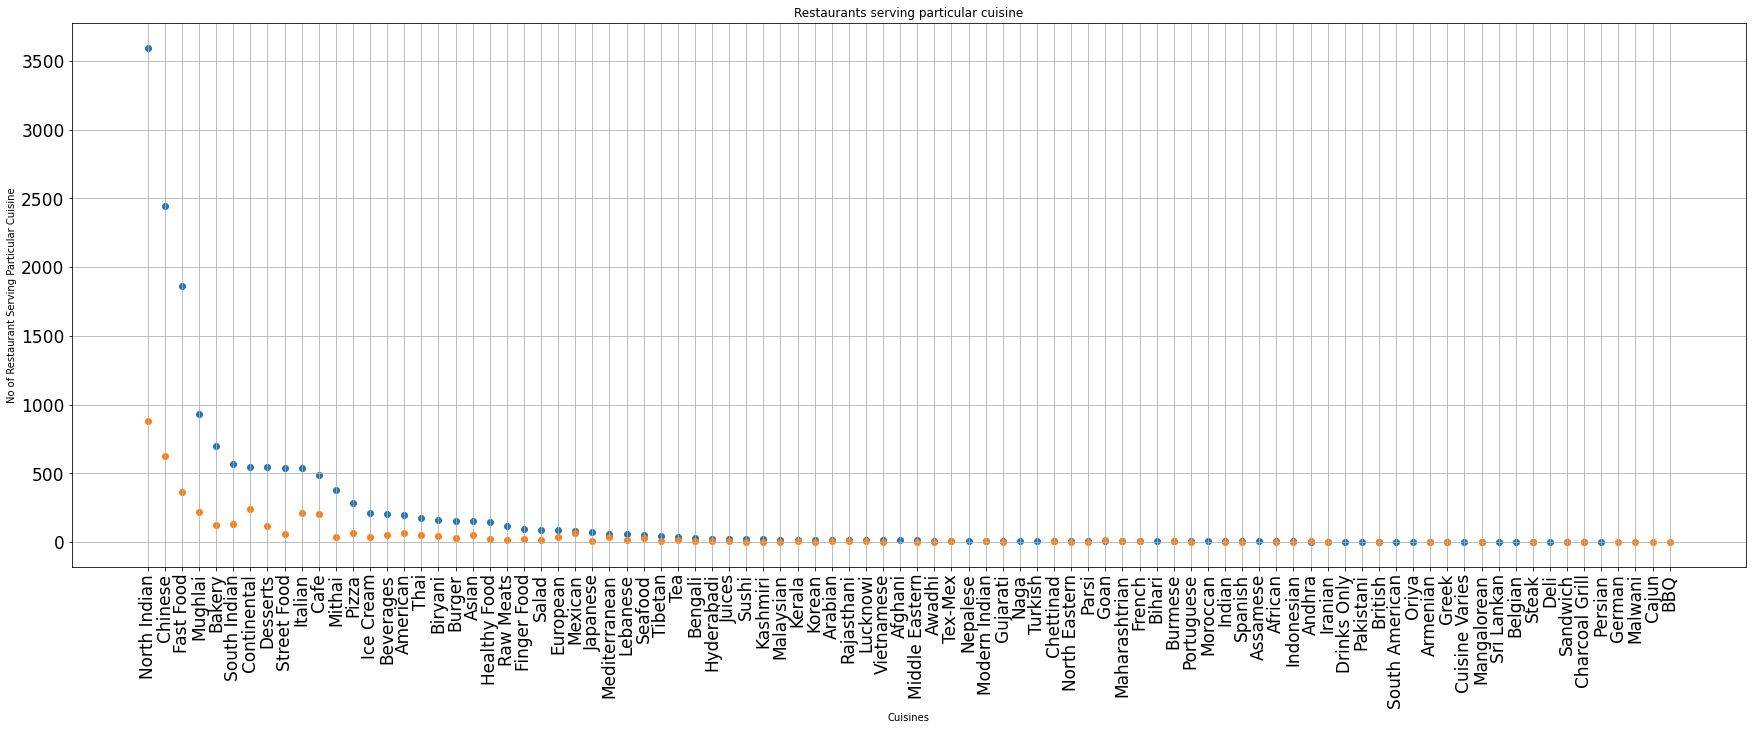

In [110]:
import csv 
import numpy as np 
import pandas as pd 
import requests 
import matplotlib.pyplot as plt 
data = pd.read_csv('Downloads/zomato.csv', encoding = 'latin1') 
df = data.copy() 
df1 = df.loc[df['Country Code'] == 1] 
delhi_ncr = ['New Delhi', 'Ghaziabad','Noida', 'Gurgaon', 'Faridabad'] 
a = df1.loc[df1['City'].isin(delhi_ncr)] 
c = df1.loc[(df1['City'] != 'New Delhi') & (df1['City'] != ' Noida') & (df1['City'] != 'Ghaziabad') & (df1['City'] != 'Gurgaon') & (df1['City'] != 'Faridabad')] 
e = a['Cuisines'].str.split(',') 
x = [] 
for i in e: 
    for j in i: 
        j = j.strip() 
        x.append(j) 
f = c['Cuisines'].str.split(',') 
y = [] 
for i in f: 
    for j in i: 
        j = j.strip() 
        y.append(j) 
l = pd.DataFrame(x) 
m = pd.DataFrame(y) 
q = l.value_counts() 
w = m.value_counts() 
## NCR 
r = q.index 
s = q.values 
arr1 = [] 
for i in r: 
    for j in i: 
        arr1.append(j) 
## Rest of India 
t = w.index 
u = w.values 
arr2 = [] 
for i in t: 
    for j in i:
        arr2.append(j)  
plt.figure(figsize=(30,10)) 
plt.scatter(arr1, s) 
plt.scatter(arr2, u) 
plt.xticks(rotation = 90) 
plt.xlabel('Cuisines') 
plt.ylabel('No of Restaurant Serving Particular Cuisine') 
plt.title("Restaurants serving particular cuisine") 
plt.yticks(size = 17) 
plt.xticks(size = 17) 
plt.grid() 
plt.show() 



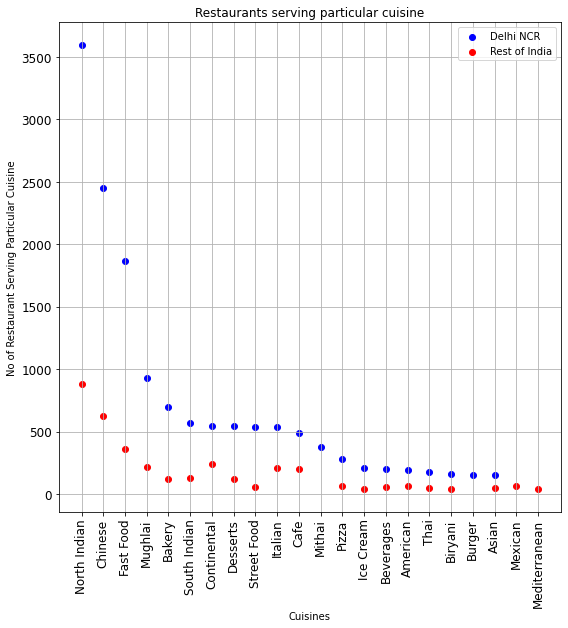

In [111]:
plt.figure(figsize=(9,9)) 
plt.scatter(arr1[:20], s[:20], c = 'blue') 
plt.scatter(arr2[:20], u[:20], c = 'red') 
plt.xticks(rotation = 90) 
plt.xlabel('Cuisines') 
plt.ylabel('No of Restaurant Serving Particular Cuisine') 
plt.legend(['Delhi NCR', 'Rest of India']) 
plt.yticks(size = 12) 
plt.xticks(size = 12) 
plt.title("Restaurants serving particular cuisine") 
plt.grid() 
plt.show() 


As we can see, North Indian cuisine is the most served cuisine in Delhi NCR and Rest of India followed by Chinese. 
More than Half of restaurant has the North Indian and Chinese as their cuisines. 
Looking forward we have Fast food as the cuisines in around 1700 restaurants in Delhi NCR alone while in around 400 restaurant in rest of India


User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
1. Number of Votes given Restaurant
2. Restaurant serving more number of cuisines.
3. Average Cost of Restaurant
4. Restaurant serving some specific cuisines.

# Answer :-

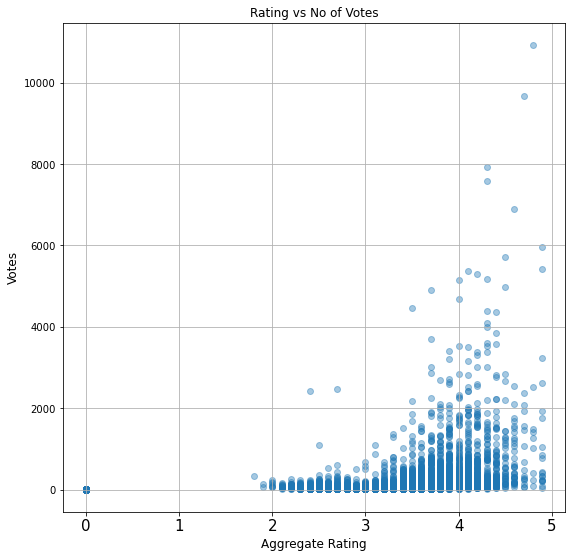

In [112]:
import csv 
import numpy as np 
import pandas as pd 
import requests 
import matplotlib.pyplot as plt 
data = pd.read_csv('Downloads/zomato.csv', encoding = 'latin1') 
df = data.copy() 
df1 = df.loc[df['Country Code'] == 1] 
df1[['Aggregate rating','Votes']] 
a = df1['Votes'] 
b = df1['Aggregate rating'] 
plt.figure(figsize=(9,9)) 
plt.scatter(b,a,alpha = 0.4) 
plt.xticks(size= 15) 
plt.yticks(size = 10) 
plt.title("Rating vs No of Votes") 
plt.xlabel('Aggregate Rating', size = 12) 
plt.ylabel('Votes', size = 12) 
plt.grid() 
plt.show() 


As we can see the graph, there is not much variations in ratings between 2 to 4.7. 
As the Votes increases, ratings also increases. 
So we can say that relation between votes and Aggregate rating is directly proportional. In a nutshell, as the votes increases, chances of good rating also increases. 
2.1.2 



# QUESTION 

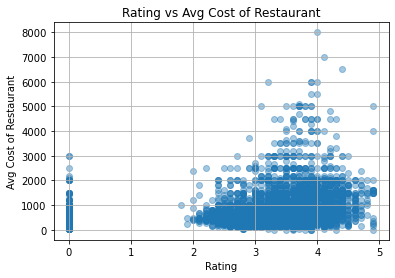

In [113]:
import csv 
import numpy as np 
import pandas as pd 
import requests 
import matplotlib.pyplot as plt 
data = pd.read_csv('Downloads/zomato.csv', encoding = 'latin1') 
df = data.copy() 
df1 = df.loc[df['Country Code'] == 1] 
df1.columns 
a = df1['Average Cost for two'] 
b = df1['Aggregate rating'] 
plt.scatter(b,a,alpha= 0.4) 
plt.xlabel('Rating') 
plt.title("Rating vs Avg Cost of Restaurant") 
plt.ylabel('Avg Cost of Restaurant') 
plt.grid() 
plt.show()

Looking at the Graph, we can see that there are few restaurants which have average cost of 7000 and above, 
which indicates the quality of food must be Great. 
Following the graph, we can see restaurants having rating of 2 - 3 has avg cost of aroung 300. Restaurants having rating of 3-4 have avg cost of around 2000 while few restaurants in it have avg cost of 6000 - 7000. Restaurants having rating of 4-5 have avg cost of 1000 - 2000.


# QUESTION 

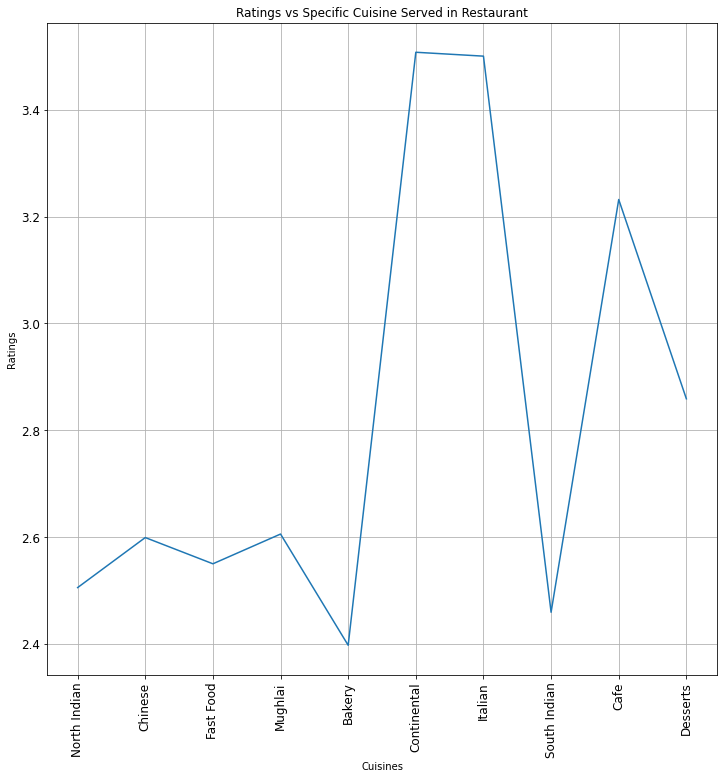

In [114]:
import csv
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

data = pd.read_csv('Downloads/zomato.csv', encoding = 'latin1')
df = data.copy()

df1 = df.loc[df['Country Code'] == 1]

a = df1['Cuisines'].str.split(',')
b = df1['Aggregate rating'].reset_index()


cuisines = []
rating = []

n=0
for i in a:
    k = 0
    for j in i:
        j = j.strip()
        cuisines.append(j)
        k+=1
    m = 0
    while m!= k:
        rating.append(b['Aggregate rating'][n])
        m+=1
    n+=1

df2 = pd.DataFrame(cuisines)
df2[1] = rating


d = {}

e = df2[0].value_counts().index
for i in e:
    f = df2.loc[df2[0] == i]
    g = f[1].sum()
    h = len(f[1])
    p = g/h
    d[i] = p


cui = []
rat = []

for i in d:
    cui.append(i)
    rat.append(d[i])


plt.figure(figsize = (12,12))
plt.plot(cui[:10], rat[:10])
plt.xticks(rotation = 90, size = 12)
plt.yticks(size= 12)
plt.xlabel('Cuisines')
plt.ylabel('Ratings')
plt.title("Ratings vs Specific Cuisine Served in Restaurant")
plt.grid()
plt.show()


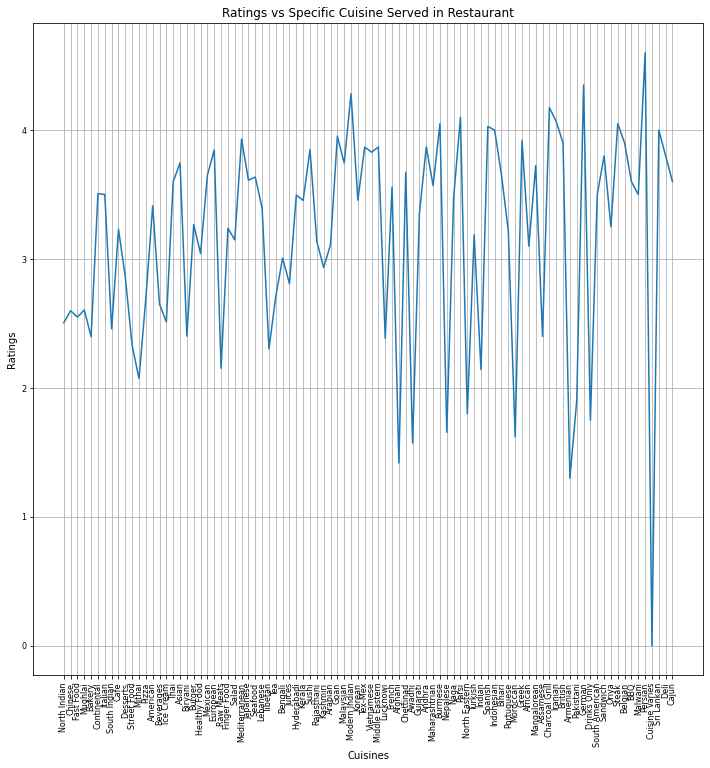

In [115]:
plt.figure(figsize = (12,12))
plt.plot(cui, rat)
plt.xticks(rotation = 90, size = 8)
plt.yticks(size= 8)
plt.xlabel('Cuisines')
plt.ylabel('Ratings')
plt.title("Ratings vs Specific Cuisine Served in Restaurant")
plt.grid()
plt.show()

Looking at the ratings, there are huge variations in it. 
As we can see, Persian is the best rated cuisine in India followed by German. 


# QUESTION

Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

# Answer :-

In [116]:
import operator
import csv
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

data = pd.read_csv('Downloads/zomato.csv', encoding = 'latin1')
da = data.dropna()
df = da.copy()
df['VR'] = df['Votes'] * df['Aggregate rating']

df1 = df.loc[df['Country Code'] == 1]

a = df1['Locality'].value_counts().index
d = {}
for i in a:
    b = df1.loc[df1['Locality'] == i]
    v = b['Votes'].sum()
    r = b['VR'].sum()
    if v == 0:             ## If not handling this case, dictionary will not sort in descending order properly.
        continue
    wrr = r/v
    d[i] =  wrr
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
j = 0
print("Top 10 Localities with Best WRR")
print()
for i in sorted_d:
    print(i,' -------------', sorted_d[i])
    j+=1
    if j == 10:
        break

Top 10 Localities with Best WRR

Hotel Clarks Amer, Malviya Nagar  ------------- 4.9
Aminabad  ------------- 4.9
Friends Colony  ------------- 4.886916367367881
Powai  ------------- 4.841868613138686
Kirlampudi Layout  ------------- 4.820161290322581
Deccan Gymkhana  ------------- 4.8
Express Avenue Mall,  Royapettah  ------------- 4.8
Banjara Hills  ------------- 4.7187617260787995
Sector 5, Salt Lake  ------------- 4.707022552098202
Riverside Mall, Gomti Nagar  ------------- 4.7


# Visualization


# QUESTION 

Plot the bar graph top 15 restaurants have a maximum number of outlets.

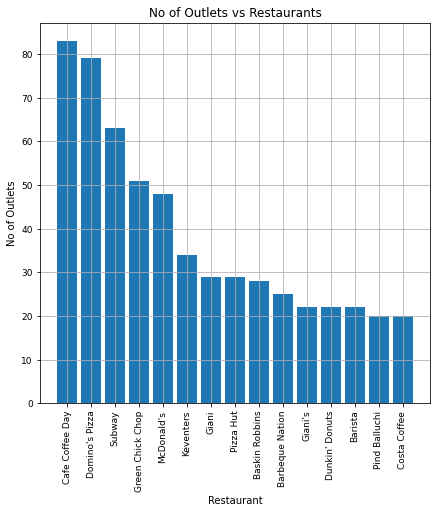

In [85]:
import csv
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

data = pd.read_csv('Downloads/zomato.csv', encoding = 'latin1')
df = data.copy()

df1 = df.loc[df['Country Code'] == 1]

a = df1['Restaurant Name'].value_counts()
b = a.index
c = a.values

plt.figure(figsize = (7,7))
plt.bar(b[:15], c[:15])
plt.xticks(rotation = 90, size= 9)
plt.yticks(size = 9)
plt.xlabel("Restaurant")
plt.ylabel('No of Outlets')
plt.title("No of Outlets vs Restaurants")
plt.grid()
plt.show()

# QUESTION 

Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

# HISTOGRAM

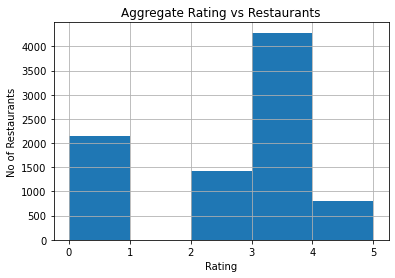

In [88]:
import csv
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

data = pd.read_csv('Downloads/zomato.csv', encoding = 'latin1')
df = data.copy()

df1 = df.loc[df['Country Code'] == 1]

x = df1['Aggregate rating'].dropna()


plt.hist(x, bins=range(6))
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
plt.title("Aggregate Rating vs Restaurants")


plt.grid()
plt.show()

# QUESTION 

Plot the bar graph top 10 restaurants in the data with the highest number of votes

# Answer

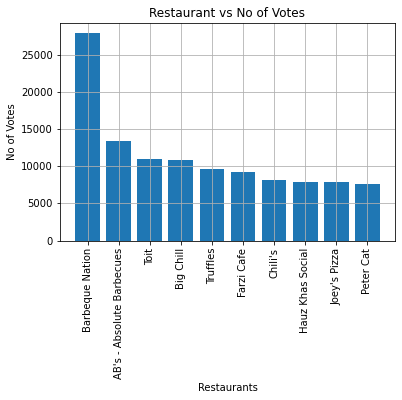

In [90]:
import operator
import csv
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

data = pd.read_csv('Downloads/zomato.csv', encoding = 'latin1')
df = data.copy()

df1 = df.loc[df['Country Code'] == 1]

a = df1['Restaurant Name'].value_counts()

d = {}
for i in a.index:
    a = df1.loc[df1['Restaurant Name'] == i]
    b = a['Votes'].sum()
    d[i] = b

sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
votes = []
restaurant = []

j = 0
for i in sorted_d:
    restaurant.append(i)
    votes.append(sorted_d[i])
    j+=1
    if j == 10:
        break

        
plt.bar(restaurant, votes)
plt.xticks(rotation = 90)
plt.xlabel('Restaurants')
plt.ylabel("No of Votes")
plt.title("Restaurant vs No of Votes")
plt.grid()
plt.show()


# QUESTION

Plot the pie graph of top 10 cuisines present in restaurants in the USA.

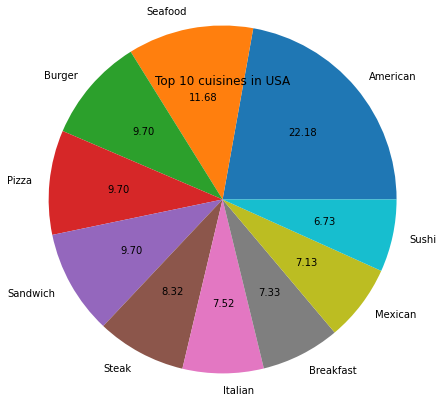

In [92]:
import csv
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

data = pd.read_csv('Downloads/zomato.csv', encoding = 'latin1')
df = data.copy()

df1 = df.loc[df['Country Code'] == 216]

a = df1['Cuisines'].str.split(',')

x = []
for i in a:
    if type(i) != float:
        for j in i:
            j = j.strip()
            x.append(j)
x  = pd.DataFrame(x)
b = x.value_counts()
c = b.index
d = b.values

z = []

for i in c:
    for j in i:
        z.append(j)
    
    
plt.pie(d[:10], labels = z[:10],radius= 2, autopct = '%.2f')
plt.title("Top 10 cuisines in USA")
plt.show()


# QUESTION 3.1.4

Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble

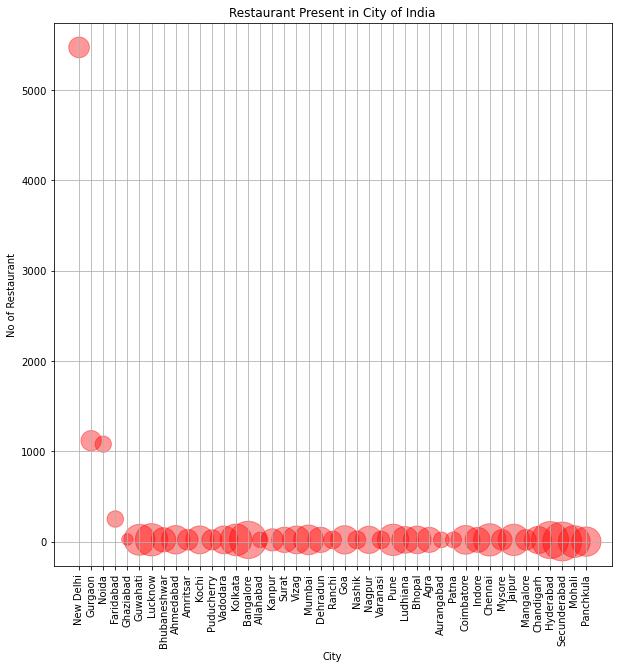

In [94]:
import csv
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

data = pd.read_csv('Downloads/zomato.csv', encoding = 'latin1')
df = data.copy()

df1 = df.loc[df['Country Code'] == 1]

a = df1['City'].value_counts()

city = a.index
no = a.values


## Counting WRR
arr1 = []
for i in city:
    b = df1.loc[df1['City'] == i]
    v = b['Votes']
    r = b['Aggregate rating']
    s = b['Votes'].sum()
    arr =[]
    for i,j in zip(v, r):
        arr.append(i*j)
        
    wrr = sum(arr)/s
    arr1.append(wrr)
    
    
    
    

plt.figure(figsize=(10,10))
plt.scatter(city, no, s = [5**i for i in arr1], alpha = 0.4,color = 'r')
plt.xticks(rotation = 90, size = 10)
plt.yticks(size = 10)
plt.xlabel('City')
plt.ylabel('No of Restaurant')
plt.title("Restaurant Present in City of India")
plt.grid()
plt.show()